# Natural Language Processingn (NLP) - ICA
Given a labeled data set imdb.cvs in the dataets folder, please construct a classifier to classify the sentiment of the review.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
data = pd.read_csv('./datasets/imdb.csv', header=None, names=["label", "website","comment","review"])
data

,label,website,comment,review
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS
...,...,...,...,...
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG


In [14]:
df = pd.DataFrame()
df["comments"] = data.comment
df["label"] = data.review
df

,comments,label
0,Girlfight follows a project dwelling New York ...,POS
1,Hollywood North is an euphemism from the movie...,POS
2,That '70s Show is definitely the funniest show...,POS
3,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,"A series of random, seemingly insignificant th...",POS
...,...,...
1995,Tourists head to Ireland for a school trip to ...,NEG
1996,Two films are useful for scaring people to God...,NEG
1997,Ulises is a literature teacher that arrives to...,NEG
1998,"Um... Okay, I guess I get the whole shaky-cam,...",NEG


In [12]:
df.describe()

,user comment,label
count,2000,2000
unique,2000,2
top,I watched this film in shire joy.This is possi...,NEG
freq,1,1000


In [5]:
df.groupby('label').describe()

website                                                              
        count unique                                               top freq
label                                                                      
3           1      1  http://www.imdb.com/title/tt0064354/usercomments    1
8           1      1  http://www.imdb.com/title/tt0893406/usercomments    1
9           1      1  http://www.imdb.com/title/tt0893406/usercomments    1
12          1      1  http://www.imdb.com/title/tt0893406/usercomments    1
17          1      1  http://www.imdb.com/title/tt0100680/usercomments    1
...       ...    ...                                               ...  ...
12482       1      1  http://www.imdb.com/title/tt0433360/usercomments    1
12483       1      1  http://www.imdb.com/title/tt0087127/usercomments    1
12487       1      1  http://www.imdb.com/title/tt0033432/usercomments    1
12488       1      1  http://www.imdb.com/title/tt0306063/usercomments    1
12489       1      1  http://www.imdb.com/title/tt0306063/usercomments    1

[1912 rows x 4 columns]

In [15]:
df['length']=df['comments'].apply(len)
df.head()

,comments,label,length
0,Girlfight follows a project dwelling New York ...,POS,694
1,Hollywood North is an euphemism from the movie...,POS,1346
2,That '70s Show is definitely the funniest show...,POS,1193
3,"9/10- 30 minutes of pure holiday terror. Okay,...",POS,829
4,"A series of random, seemingly insignificant th...",POS,2184


In [16]:
df['length'].mean()

1472.325

In [17]:
df['textstripped']=df['comments'].str.strip()
df['lengthstripped']=df['textstripped'].apply(len)
df['lengthdiff']=df['length']-df['lengthstripped']
df['lengthdiff'].head()

0    0
1    0
2    0
3    0
4    0
Name: lengthdiff, dtype: int64

/Users/beerebeerey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lengthstripped', ylabel='Density'>

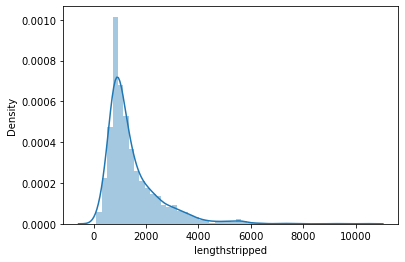

In [18]:
sns.distplot(df['lengthstripped'])

/Users/beerebeerey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lengthstripped', ylabel='Density'>

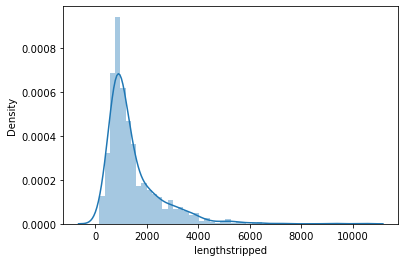

In [19]:
POS = df[df['label']=='POS']
NEG = df[df['label']=='NEG']
sns.distplot(POS['lengthstripped'])

/Users/beerebeerey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lengthstripped', ylabel='Density'>

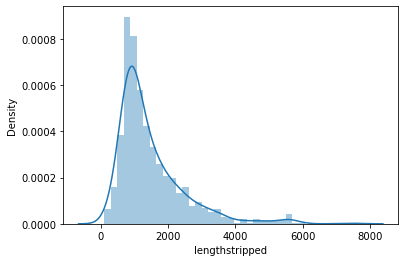

In [20]:
sns.distplot(NEG['lengthstripped'])

/Users/beerebeerey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/beerebeerey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lengthstripped', ylabel='Density'>

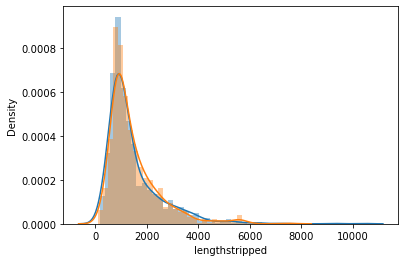

In [21]:
sns.distplot(POS['lengthstripped'])
sns.distplot(NEG['lengthstripped'])

In [22]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beerebeerey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beerebeerey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation
def pre_process(sms):
   # first, we move the punctuation
   remove_punct = "".join([word.lower() for word in sms if word not 
                  in punctuation])
   # second, we chop the into words
   tokenize = nltk.tokenize.word_tokenize(remove_punct)
   # we remove the words that don't carry much meaning (aka: they are too general)
   remove_stopwords = [word for word in tokenize if word not in
                       stopwords]
   return remove_stopwords

In [24]:
df['textstripped'].head(3).apply(pre_process)

0    [girlfight, follows, project, dwelling, new, y...
1    [hollywood, north, euphemism, movie, industry,...
2    [70s, show, definitely, funniest, show, curren...
Name: textstripped, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer = CountVectorizer(analyzer=pre_process).fit(df['textstripped'])

In [27]:
len(bow_transformer.vocabulary_)

34617

In [28]:
the_chosen_sms = df['textstripped'][555]
the_chosen_sms

"I have had the pleasure of reading Martin Torgoff's book Can't Find My Way Home which is chock full of info on the drug culture of America, spanning the years 1945-2000. This guy knows his stuff!! I found him to be an excellent spokesperson for this documentary. I particularly enjoyed watching the film clips from the hippie era, and the 70's stoner culture. The soundtrack was excellent. Whoever compiled it definitely was in touch with the tunes of each era. Hopefully they will package them and sell them as a CD set. I would highly recommend this to anyone interested in how the 1960's experiments with LSD forever changed American culture as we know it. One thing that was missing was any mention of George Jung (played by Johnny Depp in the movie Blow), who was supposedly responsible for much of the marijuana and cocaine coming into this country in the 60's-80's.I have had the pleasure of reading Martin Torgoff's book Can't Find My Way Home which is chock full of info on the drug culture

In [30]:
the_chosen_sms_bow = bow_transformer.transform([the_chosen_sms])

In [31]:
print(the_chosen_sms_bow)

  (0, 221)	2
  (0, 245)	1
  (0, 527)	1
  (0, 555)	1
  (0, 1662)	2
  (0, 1664)	1
  (0, 1978)	1
  (0, 3848)	1
  (0, 4007)	2
  (0, 4888)	2
  (0, 5213)	1
  (0, 5353)	1
  (0, 5647)	2
  (0, 6018)	1
  (0, 6116)	1
  (0, 6346)	1
  (0, 6461)	1
  (0, 7105)	1
  (0, 7552)	4
  (0, 8092)	1
  (0, 8275)	1
  (0, 9024)	1
  (0, 9424)	2
  (0, 10252)	1
  (0, 10417)	2
  :	:
  (0, 21755)	1
  (0, 22338)	1
  (0, 22573)	1
  (0, 23309)	1
  (0, 23346)	2
  (0, 24905)	2
  (0, 25056)	1
  (0, 25651)	1
  (0, 27219)	1
  (0, 27391)	1
  (0, 28637)	1
  (0, 28689)	2
  (0, 28879)	1
  (0, 29327)	1
  (0, 29560)	1
  (0, 29892)	1
  (0, 30793)	1
  (0, 31335)	2
  (0, 31377)	1
  (0, 31816)	1
  (0, 33357)	1
  (0, 33394)	2
  (0, 33735)	1
  (0, 34157)	1
  (0, 34333)	2


In [32]:
bow_transformer.get_feature_names()[221]

'19452000'

In [33]:
bow_transformer.get_feature_names()[34333]

'years'

In [34]:
sms_bow = bow_transformer.transform(df['textstripped'])

In [35]:
type(sms_bow)

scipy.sparse.csr.csr_matrix

In [36]:
sms_bow.shape

(2000, 34617)

In [37]:
sms_bow.nnz

210233

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
tfidf_tfm = TfidfTransformer().fit(sms_bow)

In [41]:
tfidf_the_chosen_sms = tfidf_tfm.transform(the_chosen_sms_bow)

In [42]:
print(tfidf_the_chosen_sms)

  (0, 34333)	0.0923422727589348
  (0, 34157)	0.03365242814872342
  (0, 33735)	0.09126174090010983
  (0, 33394)	0.07537270738523663
  (0, 33357)	0.04485464692427342
  (0, 31816)	0.09576597941308973
  (0, 31377)	0.08366014451435236
  (0, 31335)	0.24763911863987362
  (0, 30793)	0.04465391339196486
  (0, 29892)	0.0790060770966803
  (0, 29560)	0.06439358106634344
  (0, 29327)	0.11747119169297436
  (0, 28879)	0.12381955931993681
  (0, 28689)	0.24763911863987362
  (0, 28637)	0.06931377955521549
  (0, 27391)	0.054823551399615957
  (0, 27219)	0.08557972920116529
  (0, 25651)	0.07992734286784062
  (0, 25056)	0.058461173415273175
  (0, 24905)	0.1401072360467052
  (0, 23346)	0.1725514209896061
  (0, 23309)	0.052112805788310734
  (0, 22573)	0.06529886214897007
  (0, 22338)	0.0922722205938952
  (0, 21755)	0.024883468872384924
  :	:
  (0, 10417)	0.1580121541933606
  (0, 10252)	0.06387451692128063
  (0, 9424)	0.16081826952033504
  (0, 9024)	0.06955652862022517
  (0, 8275)	0.10947319436079996
  (0, 809

In [43]:
data_tfidf = tfidf_tfm.transform(sms_bow)

In [44]:
data_tfidf.shape

(2000, 34617)

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
clf = MultinomialNB().fit(data_tfidf, df['label'])

In [47]:
clf.predict(the_chosen_sms_bow)

array(['POS'], dtype='<U3')

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['textstripped'], df['label'])

In [49]:
 from sklearn.pipeline import Pipeline

In [50]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=pre_process)),
    ('tfidf',TfidfTransformer()),
    ('classify',MultinomialNB())
])

In [51]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function pre_process at 0x7f9eaae4a3a0>)),
                ('tfidf', TfidfTransformer()), ('classify', MultinomialNB())])

In [52]:
predictions = pipeline.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions,y_test)

array([[232,  61],
       [ 13, 194]])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         NEG       0.95      0.79      0.86       293
         POS       0.76      0.94      0.84       207

    accuracy                           0.85       500
   macro avg       0.85      0.86      0.85       500
weighted avg       0.87      0.85      0.85       500

